####  Step 1: Import Necessay Library

In [1]:
import pandas as pd # data manipulation and analysis (can also be read from local e.g: pd.read_csv)
import numpy as np # mathmatical calculations

# Visualization library
import matplotlib.pyplot as plt

# Ignore DeprecationWarning and FutureWarning
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

#### Step 2: Read the data from bigquery 

In [2]:
# import data from BigQuery,which provides a Python client for BigQuery. 
from google.cloud import bigquery 
# interacting with operation system
import os

# Set the path to the JSON file containing the BigQuery credentials
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = 'C:\\Users\\sonal\\Downloads\\bigquerytask-380200-cf6afa252457.json'

# Create a client object
client = bigquery.Client()

# Define the sql query
sql_query = """
     SELECT *
     FROM `bigquery-public-data.london_crime.crime_by_lsoa` 
"""

# Execute the query and convert the result to a Pandas DataFrame
df = client.query(sql_query).to_dataframe()

# Save the DataFrame to a CSV file
df.to_csv('extracted_data.csv', index = False, header = True)
print('csv file generated')

# Note: pd.read_csv("path") --- (read and import aCSV file into a Jupyter Notebook)

# Display the first five rows of the DataFrame
df.head()   

csv file generated


,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01004406,Waltham Forest,Criminal Damage,Other Criminal Damage,0,2012,5
1,E01002829,Kensington and Chelsea,Criminal Damage,Other Criminal Damage,0,2012,1
2,E01001038,Croydon,Criminal Damage,Other Criminal Damage,1,2012,8
3,E01004003,Southwark,Criminal Damage,Other Criminal Damage,0,2012,12
4,E01004533,Wandsworth,Criminal Damage,Other Criminal Damage,0,2012,6


#### Step 3. Data Exploration

In [3]:
# check the shape of the dataframe
df.shape # ( as can see that data is fully import from bigquery public data)

(13490604, 7)

In [4]:
london_crime = df.copy()

In [5]:
# provides information about a DataFrame
london_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           Int64 
 5   year            Int64 
 6   month           Int64 
dtypes: Int64(3), object(4)
memory usage: 759.1+ MB


In [6]:
london_crime['year_month'] = london_crime.apply(lambda x: '{0}-{1:02d}'.format(x['year'], x['month']), axis=1)

In [7]:
london_crime.head()

,lsoa_code,borough,major_category,minor_category,value,year,month,year_month
0,E01004406,Waltham Forest,Criminal Damage,Other Criminal Damage,0,2012,5,2012-05
1,E01002829,Kensington and Chelsea,Criminal Damage,Other Criminal Damage,0,2012,1,2012-01
2,E01001038,Croydon,Criminal Damage,Other Criminal Damage,1,2012,8,2012-08
3,E01004003,Southwark,Criminal Damage,Other Criminal Damage,0,2012,12,2012-12
4,E01004533,Wandsworth,Criminal Damage,Other Criminal Damage,0,2012,6,2012-06


In [8]:
# Group the data by year_month and calculate the sum of the values
year_month_totals = london_crime.groupby('year_month')['value'].sum()
print(year_month_totals)

year_month
2008-01    65419
2008-02    62626
2008-03    61343
2008-04    59640
2008-05    62587
           ...  
2016-08    62666
2016-09    61412
2016-10    63405
2016-11    61064
2016-12    62455
Name: value, Length: 108, dtype: Int64


#### Step 4: Analysis 

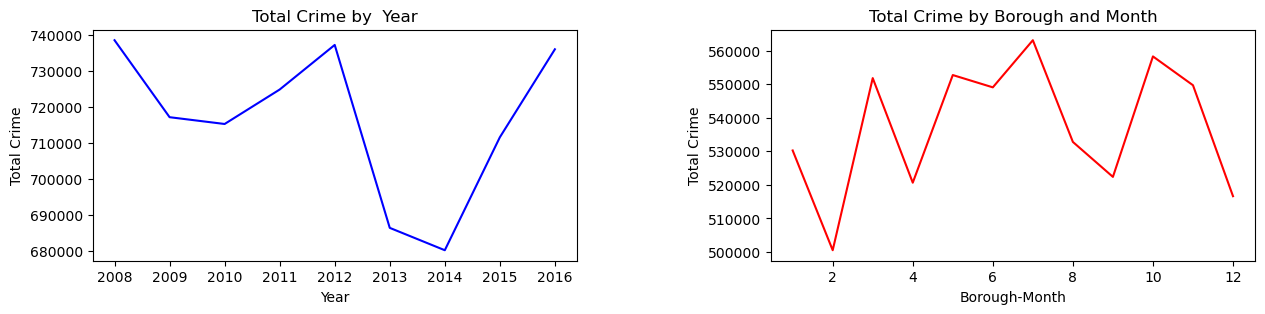

In [9]:
# Calculate the total crimes per month
crime_year = london_crime.groupby('year')['value'].sum()
crime_month = london_crime.groupby('month')['value'].sum()


# Create figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,3))

# First chart
ax1.plot(crime_year.index, crime_year.values, color='blue')
ax1.set_title('Total Crime by  Year')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Crime')

# Second chart
ax2.plot(crime_month.index, crime_month.values, color='red')
ax2.set_title('Total Crime by Borough and Month')
ax2.set_xlabel('Borough-Month')
ax2.set_ylabel('Total Crime')

# Adjust spacing between charts
plt.subplots_adjust(wspace=0.4)

# Display the charts
plt.show()

In [10]:
crime_month = london_crime.groupby('month')['value'].sum()
crime_month

month
1     530247
2     500537
3     551795
4     520648
5     552704
6     549041
7     563076
8     532784
9     522377
10    558252
11    549671
12    516626
Name: value, dtype: Int64

## Comparing the data on borough-level  (As written in the task) 

### Analysis 
### 1.  Borough by: No. of Crimes and Percentage 

In [11]:
# Total crimes per Borough
Borough_crime = london_crime.groupby('borough')['value'].sum().reset_index()
Borough_crime = Borough_crime.sort_values(by = 'value', ascending = False) 

# Total Percentage per Borough
Borough_crime['Percent'] = Borough_crime['value'] / Borough_crime['value'].sum() * 100

table_Borough_crime = pd.DataFrame({'Borough_crime': Borough_crime['borough'], 'No_of_crimes': Borough_crime['value'], 'Percent_of_crime': Borough_crime['Percent'].map('{:.1f}%'.format)})
table_Borough_crime = table_Borough_crime.set_index('Borough_crime')
table_Borough_crime.reset_index()
table_Borough_crime

,No_of_crimes,Percent_of_crime
Borough_crime,,
Westminster,455028,7.1%
Lambeth,292178,4.5%
Southwark,278809,4.3%
Camden,275147,4.3%
Newham,262024,4.1%
Croydon,260294,4.0%
Ealing,251562,3.9%
Islington,230286,3.6%
Tower Hamlets,228613,3.5%


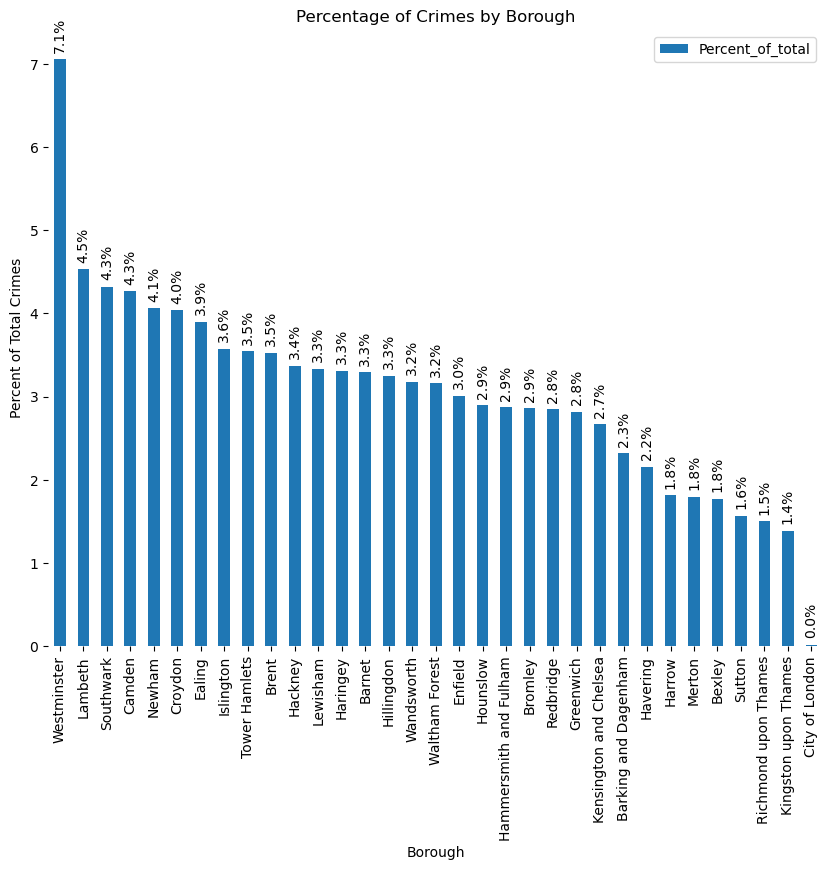

In [12]:
# Calculate the percentage of total crimes in each borough
total_crimes = table_Borough_crime['No_of_crimes'].sum()
table_Borough_crime['Percent_of_total'] = table_Borough_crime['No_of_crimes'] / total_crimes * 100

# Plot the bar chart with percentage labels
ax = table_Borough_crime.plot(kind='bar', y=['Percent_of_total'], title='Percentage of Crimes by Borough', figsize=(10, 8))
ax.set_xlabel('Borough')
ax.set_ylabel('Percent of Total Crimes')

# Add percentage labels to the bars with padding
for p in ax.containers:
    ax.bar_label(p, label_type='edge', labels=['{:.1f}%'.format(v) for v in p.datavalues], 
                 padding=5, fontsize=10, rotation=90)
    
# Remove the border from the chart
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()

#### Observation: 
- We can see that Westminster has the highest number of crimes, followed by Southwark and Lambeth. 
- City of London indeed has the least number of crimes. 

### 2. Borough by: Major Category

In [13]:
# Create a pivot table to aggregate the values by borough and major category
borough_major_category = pd.pivot_table(london_crime, values='value', index='borough', columns='major_category', aggfunc=sum)
borough_major_category = borough_major_category.fillna(0).astype('float64')

# Calculate the total crimes per borough
borough_major_category['Total'] = borough_major_category.sum(axis=1)

# Sort the dataframe by total crimes in descending order
borough_major_category = borough_major_category.sort_values(by=['Total'], ascending=False) 

# Define a custom formatting rule to remove decimal places
format_dict = {col: '{:.0f}' for col in borough_major_category.columns}

# Format the dataframe as a table
styled_table = borough_major_category.style \
    .background_gradient(cmap='Blues', axis=None) \
    .highlight_max(color = 'red',axis=0) \
    .format(format_dict)

# Display the styled table
styled_table

major_category,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person,Total
borough,,,,,,,,,,
Westminster,29295,20405,34031,273,6148,15752,59,277617,71448,455028
Lambeth,30199,26136,25083,137,4520,18408,70,114899,72726,292178
Southwark,27980,24450,27381,321,4696,16153,40,109432,68356,278809
Camden,27939,18482,21816,123,3857,9286,36,140596,53012,275147
Newham,25356,24177,18389,323,4456,16913,43,106146,66221,262024
Croydon,33376,31218,19162,270,4340,12645,55,91437,67791,260294
Ealing,30831,25613,18591,175,4406,9568,52,93834,68492,251562
Islington,22207,18354,16553,85,3675,8736,40,107661,52975,230286
Tower Hamlets,21510,21593,23408,124,4268,10050,47,87620,59993,228613


#### Observation:
- Westminster has the highest total number of crimes, followed by Lambeth and Southwark.
- Theft and Handling is the most common major category of crime across most boroughs.
- Violence Against the Person is the second most common major category of crime in most boroughs, except in Westminster where it is the third most common after Burglary.
- Drug Category also common in Westminster area. 
- Criminal Damage is common category of crime in Croydon area. 
- Fraud or Forgery mostly happend in Newham. 
- Sexual Offences happend in Lewisham area.
- Notifiable Offences happend in Hillingdon.
- Westminster stands out as having a particularly high number of crimes across all major categories, with the highest number of   crimes in most categories.
- City of London has the least number of crimes across all major categories. This may be due to its small size and low        population compared to other London boroughs.

These observations can be used to inform further analysis and investigation into the patterns and trends of crime in London, need tight police security in Westminster. 

The area is a very touristic zone where tourists are targeted for robbery. Despite that, Anti-social behaviour is still the main offence.

### 3. Borough: Year

In [14]:
# Create the pivot table
borough_years = pd.pivot_table(london_crime, values=['value'], index=['borough'], columns=['year'], aggfunc=sum)

# Format the pivot table as a styled table
styled_table = borough_years.style \
    .background_gradient(cmap='Blues', axis=None) \
    .format('{:,.0f}')\
    .highlight_max(color = 'red',axis=1)

# Display the styled table
styled_table

#### Observation:
- This shows the total number of crimes for each borough and year.
- City of London consistently had the lowest number but still crime are increasing. 
- Westminster consistently had the highest total number of crimes each year
- Most boroughs experienced a increase in the total number of crimes between 2008 and 2016, with some exceptions such as  Bextely crime rate decreasing.
- Most boroughs had a relatively stable trend in the total number of crimes over the years, with some fluctuations up and down from year to year.

These insights can be used to further analyze the patterns and trends of crime in London and identify potential factors that contribute to the overall decrease in crime.

### 4. Borough: Month

In [15]:
# Create the pivot table
borough_month = pd.pivot_table(london_crime, values=['value'], index=['borough'], columns=['month'], aggfunc=sum)

# Rename the columns
new_columns = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
borough_month.columns = new_columns

# Format the pivot table as a styled table and highlight maximum value for each borough
styled_table = borough_month.style \
    .background_gradient(cmap='Blues', axis=None) \
    .format('{:,.0f}') \
    .highlight_max(color = 'red',axis=1)

# Display the styled table
styled_table

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
borough,,,,,,,,,,,,
Barking and Dagenham,"12,610","12,193","13,451","12,323","12,844","12,451","13,205","12,315","11,883","12,203","12,572","11,397"
Barnet,"17,550","16,659","18,447","17,421","17,999","17,908","18,297","16,775","16,902","18,398","18,523","17,312"
Bexley,"9,576","8,959","10,133","9,179","9,903","9,492","9,805","9,063","9,053","9,783","9,929","9,261"
Brent,"18,744","17,535","19,296","18,026","19,718","19,342","19,698","18,478","18,184","20,189","20,033","18,308"
Bromley,"15,770","14,684","15,843","14,714","15,785","15,159","16,164","14,703","14,616","15,757","15,749","15,405"
Camden,"22,288","21,332","24,027","22,305","24,181","23,514","24,133","21,900","21,731","24,125","23,639","21,972"
City of London,58,56,49,53,61,52,53,75,90,70,74,89
Croydon,"22,198","19,986","22,015","20,954","22,169","22,376","22,629","21,623","21,255","22,013","22,290","20,786"
Ealing,"20,398","19,629","21,401","20,416","22,067","21,753","22,557","20,806","20,249","21,687","20,973","19,626"


#### Observation :
- This table shows the total number of crimes in each borough for each month of the year. 
- Westminster had highest number of crimes in each month. highest number in dec (winter holidays) and June, July (Summer). 
- The highest crime rates tend to occur in the summer months (June-August) and the lowest rates in the winter months (December-February). This could be due to a variety of factors, such as increased outdoor activity and social gatherings during the summer, and decreased activity during the winter holiday



### 5. Borough: Major Category (Stacked Bar Chart)

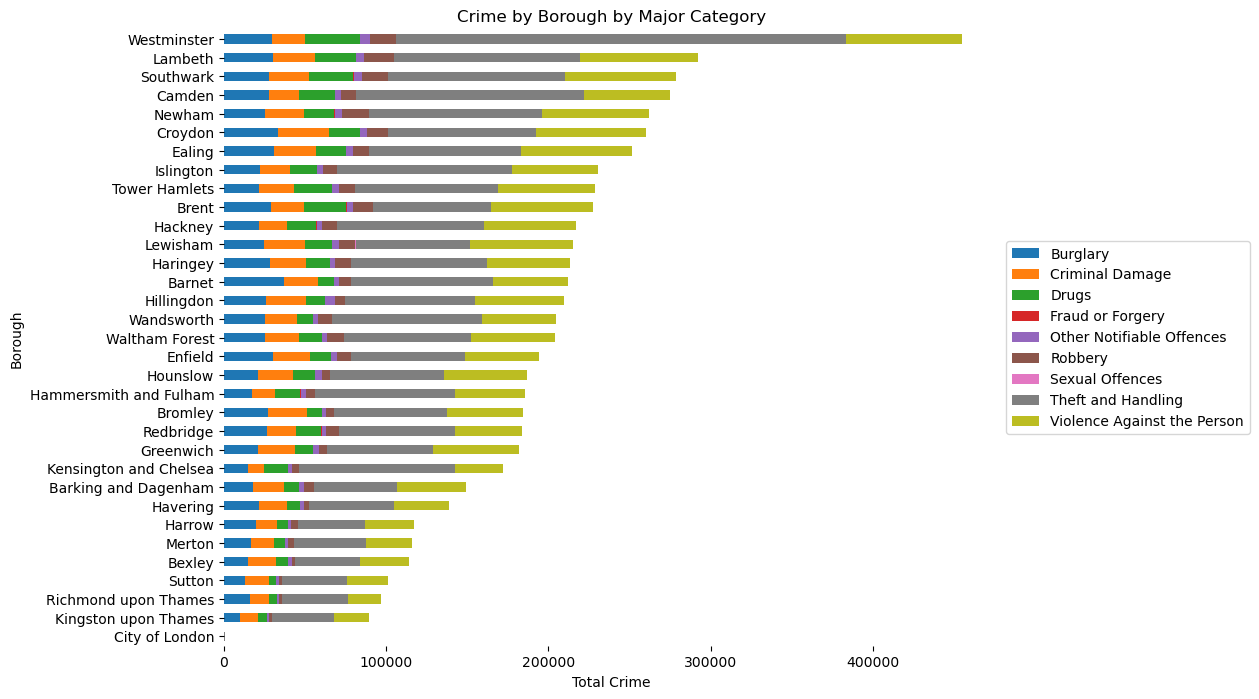

In [16]:
# Create a pivot table to aggregate the values by borough and major category
borough_major_category = pd.pivot_table(london_crime, values='value', index='borough', columns='major_category', aggfunc=sum)

# Calculate the total crimes per borough
borough_major_category['Total'] = borough_major_category.sum(axis=1)

# Sort the dataframe by total crimes in ascending order
borough_major_category = borough_major_category.sort_values(by=['Total'], ascending=True) 

# Drop the 'Total' column
borough_major_category = borough_major_category.drop('Total', axis=1)
borough_major_category = borough_major_category.apply(lambda x: x.sort_values(ascending=True), axis=1)

# Create a stacked bar chart
ax = borough_major_category.plot(kind='barh', stacked=True, figsize=(10,8))

# Set the chart title and axis labels
ax.set_title('Crime by Borough by Major Category')
ax.set_xlabel('Total Crime')
ax.set_ylabel('Borough')

# Move the legend outside the chart
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Remove the border from the chart
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()


#### Observation:
- This chart shows the distribution of crimes by major category in each borough of London. 
- Westminster has the highest total number of crimes among all the boroughs, followed by Southwark and Lambeth. 
- The top three major categories of crimes across all the boroughs are theft and handling, violence against the person, and criminal damage.

This suggests that crime prevention strategies should be tailored to each specific borough, taking into account the different types of crimes that are most prevalent in each area.

### 6. Borough: Minor Catgeory

In [17]:
crime_minor = london_crime.groupby('minor_category')['value'].sum()
crime_minor

minor_category
Assault with Injury                       451001
Burglary in Other Buildings               263011
Burglary in a Dwelling                    491282
Business Property                          21295
Common Assault                            413690
Counted per Victim                          3840
Criminal Damage To Dwelling               154116
Criminal Damage To Motor Vehicle          265463
Criminal Damage To Other Building          66003
Drug Trafficking                           35819
Going Equipped                              5530
Handling Stolen Goods                      16100
Harassment                                458124
Motor Vehicle Interference & Tampering     56224
Murder                                       949
Offensive Weapon                           37983
Other Criminal Damage                     145356
Other Drugs                                 2998
Other Fraud & Forgery                       1485
Other Notifiable                          100819
Other

### 7. Borough: Minar Category each level

In [18]:
# Create a pivot table to aggregate the values by borough and major category
borough_minor_category = pd.pivot_table(london_crime, values='value', index='borough', columns='minor_category', aggfunc=sum)
borough_minor_category = borough_minor_category.fillna(0).astype('float64')

# Calculate the total crimes per borough
borough_minor_category['Total'] = borough_minor_category.sum(axis=1)

# Sort the dataframe by total crimes in descending order
borough_minor_category = borough_minor_category.sort_values(by=['Total'], ascending=False) 

# Define a custom formatting rule to remove decimal places
format_dict = {col: '{:.0f}' for col in borough_minor_category.columns}

# Format the dataframe as a table
styled_table = borough_minor_category.style \
    .background_gradient(cmap='Blues', axis=None) \
    .highlight_max(color = 'red',axis=0) \
    .format(format_dict)

# Display the styled table
styled_table

minor_category,Assault with Injury,Burglary in Other Buildings,Burglary in a Dwelling,Business Property,Common Assault,Counted per Victim,Criminal Damage To Dwelling,Criminal Damage To Motor Vehicle,Criminal Damage To Other Building,Drug Trafficking,Going Equipped,Handling Stolen Goods,Harassment,Motor Vehicle Interference & Tampering,Murder,Offensive Weapon,Other Criminal Damage,Other Drugs,Other Fraud & Forgery,Other Notifiable,Other Sexual,Other Theft,Other Theft Person,Other violence,Personal Property,Possession Of Drugs,Rape,Theft From Motor Vehicle,Theft From Shops,Theft/Taking Of Motor Vehicle,Theft/Taking of Pedal Cycle,Wounding/GBH,Total
borough,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Westminster,20219,17184,12111,702,19127,143,3427,7514,3990,1657,407,825,20976,1501,28,1818,5474,268,130,5741,54,142032,56756,3135,15050,32106,5,21735,35929,6108,12731,6145,455028
Lambeth,21103,8815,21384,1457,18957,70,7602,9948,2896,1874,307,790,19150,1882,53,2532,5690,263,67,4213,57,44006,20714,3841,16951,22946,13,20019,9242,8475,9771,7090,292178
Southwark,19793,11742,16238,1214,18009,231,6698,9104,2852,2047,213,691,18855,2176,52,2061,5796,180,90,4483,30,42879,15105,3380,14939,25154,10,18103,10726,8836,10916,6206,278809
Camden,14516,13257,14682,669,14091,71,4429,6626,2989,1557,204,683,17269,1923,24,1112,4438,219,52,3653,31,64265,26050,1922,8617,20040,5,18292,11624,6412,11347,4078,275147
Newham,19452,8566,16790,1134,19786,255,6806,9716,2145,1155,185,701,15539,2662,56,1852,5510,81,68,4271,27,33289,13839,3178,15779,17153,16,28771,12253,10531,4100,6358,262024
Croydon,21322,11268,22108,1373,18363,231,8035,13353,3235,1261,159,574,17898,2119,45,1912,6595,98,39,4181,36,33021,5976,2989,11272,17803,19,22786,15175,9085,2701,5262,260294
Ealing,18027,8819,22012,723,18598,137,5744,11850,2409,1562,182,542,22094,2190,46,1241,5610,127,38,4224,46,29165,7436,3382,8845,16902,6,28071,13086,7766,5578,5104,251562
Islington,13589,9353,12854,733,14016,51,5144,6750,2067,1525,232,781,17631,1955,45,1296,4393,123,34,3443,34,37330,23656,2004,8003,14905,6,15977,10930,6331,10701,4394,230286
Tower Hamlets,15440,10276,11234,608,17121,54,5337,7898,2775,1740,230,668,18439,1473,45,1384,5583,100,70,4038,34,32995,11846,2241,9442,21568,13,15274,6990,7632,10742,5323,228613


#### Observation:
- This table shows the total number of crimes in each borough broken down by minor category.
- Westminster has the highest total number of crimes, followed by Southwark and Lambeth.
- Westminster has the highest number of crimes in every minor category like Burglary in Other Buildings, Criminal Damage To Other Building, Handling Stolen Goods, Other Theft	Other Theft Person, Theft From Shops, Theft/Taking of Pedal Cycle. 
- In Lambeth these are most common crime Business Property, Drug Trafficking, Offensive Weapon, Other Sexual, Other violence,	Personal Property, Wounding/GBH. 
- In Newham area these are the most common minor category Assault and Counted per Victim.
-  In Croydon area Assault with Injury, Criminal Damage To Dwelling and	Criminal Damage To Motor Vehicle are common minor category crime. 
- Harassment is common in Ealing. 
-  In Barnet area these crime happend Motor Vehicle Interference & Tampering and Burglary in a Dwelling.

### 8. Top 5 Minor Crime Categories

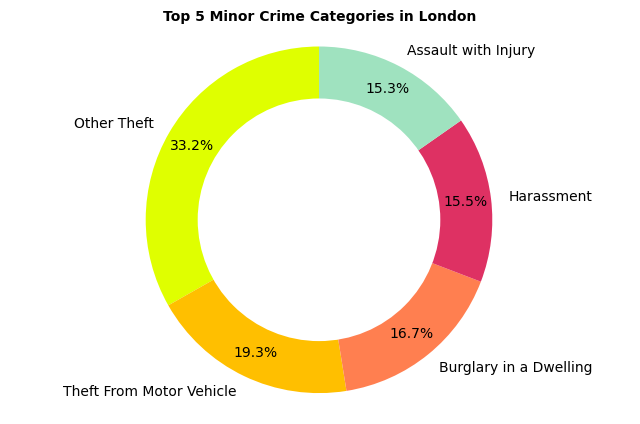

In [19]:
# Group data by minor category and sum values
crime_minor = london_crime.groupby('minor_category')['value'].sum().sort_values(ascending=False)

# Get the top 5 minor categories
top_categories = crime_minor.head(5)

# Create a list of colors for the chart
colors = ['#DFFF00', '#FFBF00', '#FF7F50', '#DE3163', '#9FE2BF']

# Create the donut chart
fig, ax = plt.subplots(figsize=(8, 5))
ax.pie(top_categories, colors=colors, labels=top_categories.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
ax.axis('equal')
ax.set_title('Top 5 Minor Crime Categories in London', fontsize=10, fontweight='bold')

# Add a circle to create the donut chart
circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(circle)

plt.show()

#### Based on the donut chart we created, the top 5 minor crime categories in London are:

- Other Theft - 33.2%
- Theft from Motor Vehicle - 19.3%
- Burglary in a Dwelling - 16.7%
- Harassment- 15.5%
- Assault with Injury - 15.3%

Theft and Handling is the largest category, accounting for almost one-third of all reported crimes. This category includes offenses such as theft, burglary, and robbery. Violence Against the Person is the second largest category, which includes crimes such as assault, harassment, and homicide. Criminal Damage, Other Notifiable Offences, and Public Order are the remaining categories in the top 5, with each accounting for around 10% or less of all reported crimes.

These insights can be useful for law enforcement agencies and policymakers to focus their efforts on addressing the most prevalent crime categories in London. For example, initiatives to prevent theft and handling could be prioritized to reduce the number of reported crimes in this category. Additionally, measures to prevent and respond to violence against the person could be strengthened to ensure the safety of individuals in London.

#### Recommendations: 
 
Increase Police Presence and Surveillance: With Westminster experiencing a high number of crimes, it is recommended to increase police presence and surveillance in the area. This could help to deter potential offenders and make the area safer for residents and visitors.

Focus on Specific Crime Categories: To reduce the number of crimes in Westminster, it is important to focus on specific crime categories that are more prevalent in the area. By identifying and targeting these categories, law enforcement agencies and policymakers can take steps to prevent and address them.

Improve Public Safety Measures: Improving public safety measures in Westminster can also help to reduce crime in the area. This can include measures such as installing more CCTV cameras, improving street lighting, and increasing the number of police patrols.

Community Engagement: It is also important to engage with the local community to understand their concerns and perspectives on crime in the area. By building relationships with the community and working together, law enforcement agencies and policymakers can develop more effective strategies to prevent and address crime.

The key insight from this analysis is that crime is not evenly distributed across London, with certain boroughs experiencing higher levels of crime than others. By understanding the patterns and trends of crime in different areas, law enforcement agencies and policymakers can develop targeted strategies to prevent and address crime, making London a safer place for everyone.